In [1]:
import tensorflow as tf

print("Versión de tensorflow:{}".format(tf.__version__))
print("GPU:{}".format(tf.test.gpu_device_name()))

Versión de tensorflow:2.11.0
GPU:


In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['Camiseta','Pantalón','Suéter','Vestido','Abrigo','Sandalia','Camisa','Zapatilla deportiva','Bolso','Botines']

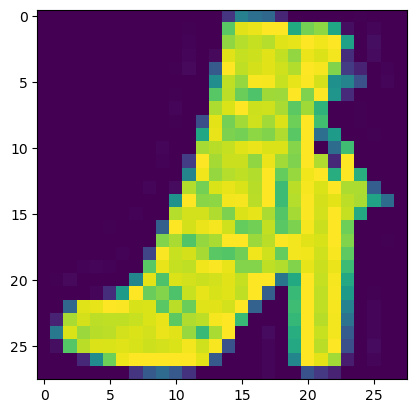

Botines
(28, 28)


In [5]:
plt.imshow(train_images[11])
plt.grid(False)
plt.show()
print(class_names[train_labels[11]])
print(train_images[11].shape)

In [6]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28,28)),
 keras.layers.Dense(150, activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer = 'adadelta',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 10)                1510      
                                                                 
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_images,train_labels, batch_size=12, epochs=50)

Epoch 1/50
5000/5000 [==============================] - 15s 3ms/step - loss: 68.5506 - accuracy: 0.2987
Epoch 2/50
5000/5000 [==============================] - 14s 3ms/step - loss: 28.7751 - accuracy: 0.5034
Epoch 3/50
5000/5000 [==============================] - 12s 2ms/step - loss: 21.9214 - accuracy: 0.5639
Epoch 4/50
5000/5000 [==============================] - 12s 2ms/step - loss: 18.2940 - accuracy: 0.5994
Epoch 5/50
5000/5000 [==============================] - 12s 2ms/step - loss: 16.0035 - accuracy: 0.6267
Epoch 6/50
5000/5000 [==============================] - 12s 2ms/step - loss: 14.4323 - accuracy: 0.6485
Epoch 7/50
5000/5000 [==============================] - 13s 3ms/step - loss: 13.2446 - accuracy: 0.6650
Epoch 8/50
5000/5000 [==============================] - 11s 2ms/step - loss: 12.3080 - accuracy: 0.6775
Epoch 9/50
5000/5000 [==============================] - 10s 2ms/step - loss: 11.5668 - accuracy: 0.6875
Epoch 10/50
5000/5000 [==============================] - 12s 2ms

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 5.5671 - accuracy: 0.7694
Test: 0.7694000005722046


313/313 [==============================] - 1s 4ms/step
Vestido


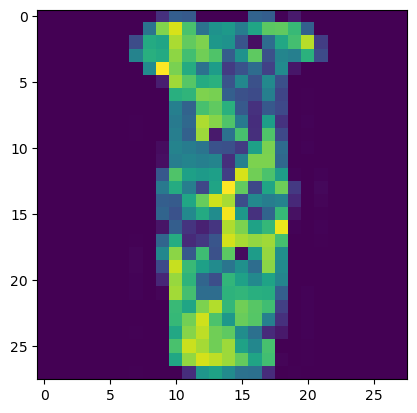

In [29]:
predictions = model.predict(test_images)
img_predict =predictions[100]
print(class_names[np.argmax(img_predict)])
plt.imshow(test_images[100])
plt.grid(False)
plt.show()